<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

# What is the solution if a=1, and b=1, what is the solution if a=2 and b=2
  
1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $
   



In [3]:
import scipy.optimize as opt
import scipy as sc
import matplotlib.pylab as plt 
import numpy as np
opt.bisect

<function scipy.optimize._zeros_py.bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)>

In [4]:
def f1(x,a1,b1):
  return a1*np.sqrt(x**2+1)+b1*np.exp(x)*np.sin(x)-7

In [5]:
#Revisando el gráfico es posible ver que tiene varias raices (Esto depende del dominio)
#se agregaron los puntos al gráfico
params=(1,1)
p1=sc.optimize.bisect(f1,-1,2,args=params)
p2=sc.optimize.bisect(f1,2.5,3.5,args=params)
p3=sc.optimize.bisect(f1,6.2,6.5,args=params)

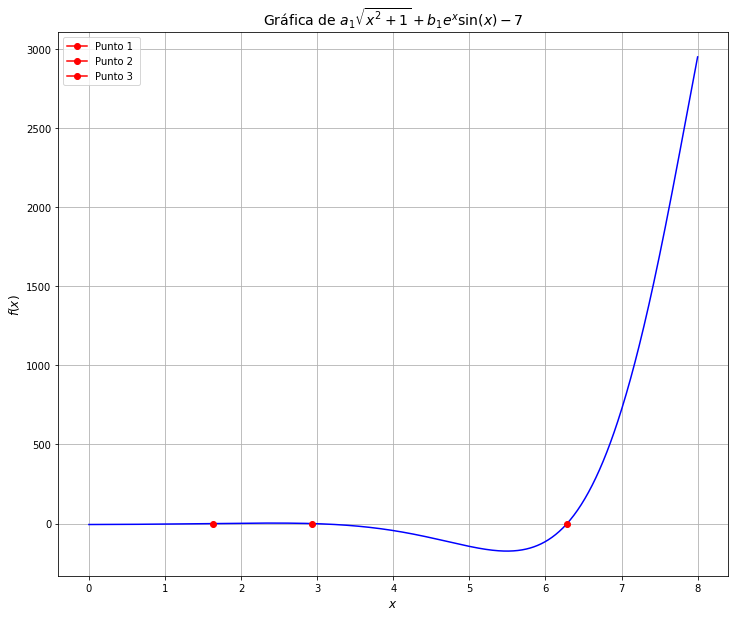

In [6]:
#primera intuicion
plt.figure(figsize=(12,10))
x=np.linspace(0,8,1000)
plt.plot(x,f1(x,*params),color='b')
plt.plot(p1,f1(p1,1,1),marker='o',color='r',label='Punto 1')
plt.plot(p2,f1(p2,1,1),marker='o',color='r',label='Punto 2')
plt.plot(p3,f1(p3,1,1),marker='o',color='r',label='Punto 3 ')
plt.legend()
plt.xlabel("$x$",size=12)
plt.ylabel("$f(x)$",size=12)
plt.title("Gráfica de $a_1\sqrt{x^2+1}+b_1e^x\sin(x)-7$",size=14)
plt.grid(True)

In [7]:
print("Las raices encontradas por método de bisección  en un intervalo de [0,8] son ",p1,p2,p3)

Las raices encontradas por método de bisección  en un intervalo de [0,8] son  1.6287184949273978 2.9321585327943467 6.284372640484436


In [8]:
#Ahora para los parámetros a=2 y b=2
params1=(2,2)
p1=sc.optimize.bisect(f1,0.5,1.5,args=params1)
p2=sc.optimize.bisect(f1,3,3.5,args=params1)
p3=sc.optimize.bisect(f1,6,6.5,args=params1)

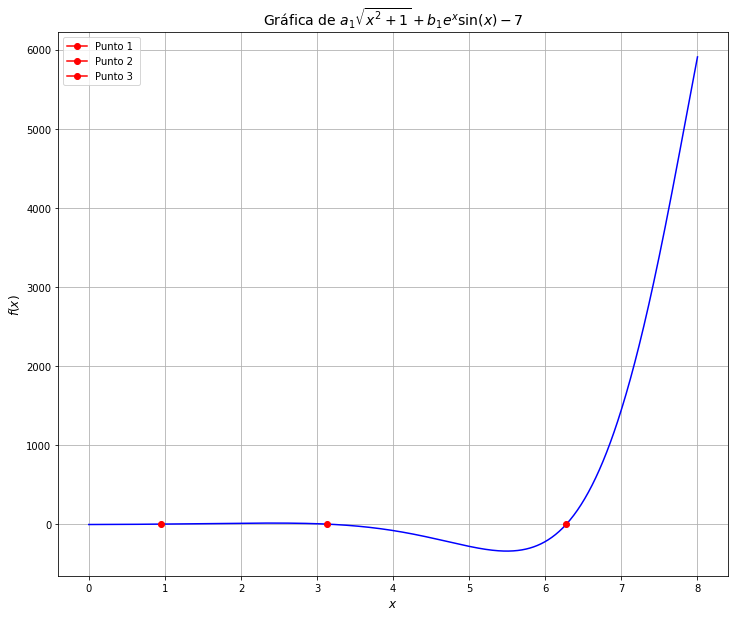

In [9]:
#primera intuicion
plt.figure(figsize=(12,10))
x=np.linspace(0,8,1000)
plt.plot(x,f1(x,*params1),color='b')
plt.plot(p1,f1(p1,2,2),marker='o',color='r',label='Punto 1')
plt.plot(p2,f1(p2,2,2),marker='o',color='r',label='Punto 2')
plt.plot(p3,f1(p3,2,2),marker='o',color='r',label='Punto 3 ')
plt.legend()
plt.xlabel("$x$",size=12)
plt.ylabel("$f(x)$",size=12)
plt.title("Gráfica de $a_1\sqrt{x^2+1}+b_1e^x\sin(x)-7$",size=14)
plt.grid(True)

In [10]:
print("Las raices encontradas por método de bisección  en un intervalo de [0,8] son ",p1,p2,p3)

Las raices encontradas por método de bisección  en un intervalo de [0,8] son  0.954051251295823 3.1323505942436896 6.277821362758914


Método de Newton-Rapshon

In [11]:
import sympy as sp
x=sp.symbols("x")
a1=sp.symbols("a")
b1=sp.symbols("b")

In [12]:
import sympy as sp
def func1(x, a1, b1 ):
  return a1*sp.sqrt(x**2+1)+b1*sp.exp(x)*sp.sin(x)-7

#calculando la derivada con sympy
d=sp.diff(func1(x,a1,b1),x)

In [13]:
funcion1 =sp.lambdify([x,a1,b1],func1(x,a1,b1),"numpy")
fderivate=sp.lambdify([x,a1,b1,],d,"numpy")

In [14]:
#Raices para los parametros 1,1
root1= opt.newton(funcion1,3, fderivate,args=params)
root2=opt.newton(funcion1,2, fderivate,args=params)
root3=opt.newton(funcion1,6, fderivate,args=params)

#Raices para los parametros 2,2

roota= opt.newton(funcion1,1, fderivate,args=params1)
rootb= opt.newton(funcion1,3, fderivate,args=params1)
rootc= opt.newton(funcion1,6.27, fderivate,args=params1)

print("Las raices para los parámetros (1,1) son ",root1,root2, root3,"y para (2,2) son",roota,rootb,rootc)

Las raices para los parámetros (1,1) son  2.9321585327957487 1.6287184949270082 6.2843726404836735 y para (2,2) son 0.9540512512965833 3.1323505942423657 6.277821362757123


**Método de la secante :**
Se establece a partir del mismo método anterior sin embargo ya no se usa la derivada de la función que estamos analizando.

In [19]:
#Raices para los parametros 1,1
root1= opt.newton(funcion1,3,args=params,x1=4)
root2=opt.newton(funcion1,2,args=params,x1=1)
root3=opt.newton(funcion1,6,args=params,x1=7)

#Raices para los parametros 2,2

roota= opt.newton(funcion1,1,args=params1,x1=2)
rootb= opt.newton(funcion1,3, args=params1,x1=2)
rootc= opt.newton(funcion1,6, args=params1,x1=7)

print("Las raices para los parámetros (1,1) son ",root1,root2, root3,"y para (2,2) son",roota,rootb,rootc)

Las raices para los parámetros (1,1) son  2.9321585327957487 1.6287184949270028 6.284372640483535 y para (2,2) son 0.9540512512965864 2.5629450962327742 6.277821362756993


Es posible ver que los valores de las raíces halladas con el método Newthon_Raphson y la secante son muy aproximados.

Método de Punto Fijo 

In [21]:
def g(x,a,b):
  g=x-f1(x,a,b)
  return(g)

In [22]:
#Raices para los parámetros (1,1)
sol1 = opt.fixed_point(g, 2,args=params)
sol2 = opt.fixed_point(g, 3,args=params)
sol3 = opt.fixed_point(g, 6,args=params)
#Raices para los parámetros (2,2)
solu1 = opt.fixed_point(g,1,args=params1)
solu2 = opt.fixed_point(g, 3,args=params1)
solu3 = opt.fixed_point(g, 6,args=params1)

print("Las raices para los parámetros (1,1) son ",sol1,sol2, sol3,"y para (2,2) son",solu1,solu2,solu3)

Las raices para los parámetros (1,1) son  1.6287184949270084 2.9321585327957544 6.0 y para (2,2) son 0.9540512512965833 -3.3466223131438624 6.0


  
 2. $a e^{x}-2= b\cos(e^x-2)$

Método de la bisección

In [24]:
def f2(x,a1,b1):
  return a1*np.exp(x)-2-b1*np.cos(np.exp(x)-2)

In [25]:
#Calculando la raiz (ver gráfico)
params=(1,1)
p1=sc.optimize.bisect(f2,0,2,args=params)
print("La raiz encontrada por método de bisección es  ",p1)

La raiz encontrada por método de bisección es   1.0076239716563578


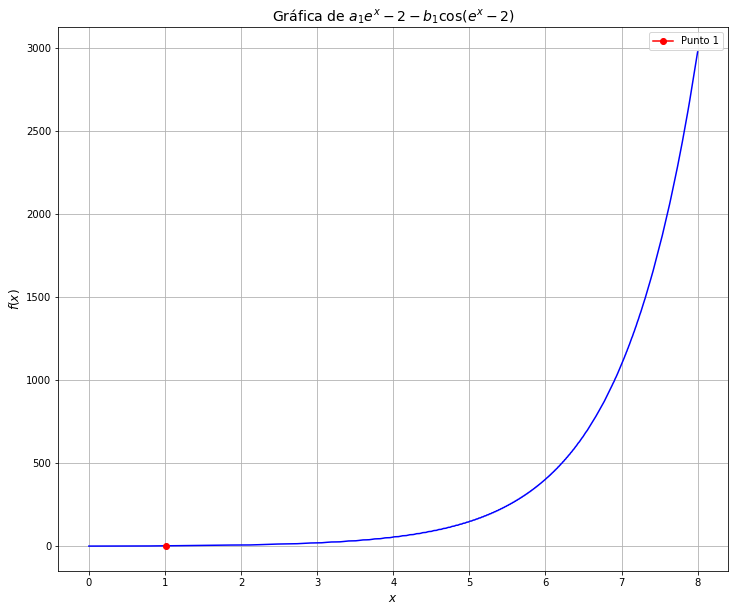

In [26]:
#primera intuicion
plt.figure(figsize=(12,10))
x=np.linspace(0,8,1000)
plt.plot(x,f2(x,*params),color='b')
plt.plot(p1,f2(p1,1,1),marker='o',color='r',label='Punto 1')
plt.legend()
plt.xlabel("$x$",size=12)
plt.ylabel("$f(x)$",size=12)
plt.title("Gráfica de $a_1e^x - 2 - b_1\cos(e^x-2)$",size=14)
plt.grid(True)

In [27]:
#Ahora para los parámetros a=2 y b=2
params1=(2,2)
p1=sc.optimize.bisect(f2,0,1,args=params1)
print("La raiz encontrada por método de bisección es  ",p1)

La raiz encontrada por método de bisección es   0.6931471805601177


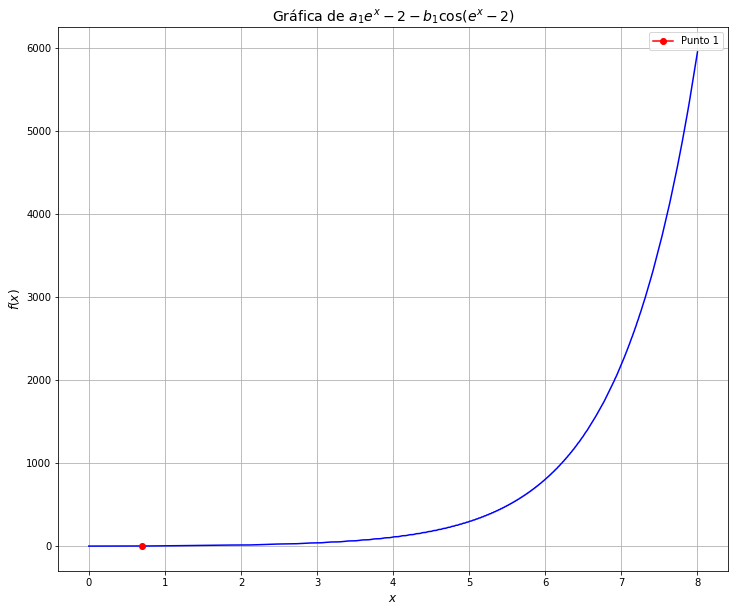

In [28]:
#primera intuicion
plt.figure(figsize=(12,10))
x=np.linspace(0,8,1000)
plt.plot(x,f2(x,*params1),color='b')
plt.plot(p1,f2(p1,2,2),marker='o',color='r',label='Punto 1')
plt.legend()
plt.xlabel("$x$",size=12)
plt.ylabel("$f(x)$",size=12)
plt.title("Gráfica de $a_1e^x - 2 - b_1\cos(e^x-2)$",size=14)
plt.grid(True)

Método de Newton-Rapshon

In [29]:
def f2(x,a1,b1):
  return a1*sp.exp(x)-2-b1*sp.cos(sp.exp(x)-2)

In [34]:
#calculando la derivada con sympy
import sympy as sp
x=sp.symbols("x")
a1=sp.symbols("a")
b1=sp.symbols("b")
d=sp.diff(f2(x,a1,b1),x)

In [35]:
funcion2 =sp.lambdify([x,a1,b1],f2(x,a1,b1),"numpy")
fderivat=sp.lambdify([x,a1,b1,],d,"numpy")

In [36]:
#Raices para los parametros 1,1
root1= opt.newton(funcion2,1, fderivat,args=params)

#Raices para los parametros 2,2
roota= opt.newton(funcion2,1, fderivat,args=params1)

print("Las raices para los parámetros (1,1) son ",root1,"y para (2,2) son",roota)

Las raices para los parámetros (1,1) son  1.0076239716581368 y para (2,2) son 0.6931471805599454


Método de la secante

In [38]:
#Raices para los parametros 1,1
root1= opt.newton(funcion2,1,args=params,x1=2)

#Raices para los parametros 2,2
roota= opt.newton(funcion2,1,args=params1,x1=2)

print("Las raices para los parámetros (1,1) son ",root1,"y para (2,2) son",roota)

Las raices para los parámetros (1,1) son  1.0076239716579765 y para (2,2) son 0.6931471805599888


Método de Punto fijo

In [44]:
def g1(x,a,b):
  g=x-funcion2(x,a,b)
  return(g)

In [45]:
#Raices para los parámetros (1,1)
sol1 = opt.fixed_point(g1, 1,args=params)

#Raices para los parámetros (2,2)
solu1 = opt.fixed_point(g1,1,args=params1)

print("Las raices para los parámetros (1,1) son ",sol1,"y para (2,2) son",solu1)

Las raices para los parámetros (1,1) son  1.0076239716581368 y para (2,2) son 0.6931471805599453


# 3. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [108]:
import scipy.optimize as opt
import scipy as sc
import matplotlib.pylab as plt 
import numpy as np
import sympy as sp

In [109]:
#definiendo en sympy 
r=sp.symbols('r')
R=sp.symbols('R')
rho0=sp.symbols('rho0')
L=sp.symbols('L')
rho_=sp.symbols('rho_')
M = 4*sp.pi*rho0*sp.integrate(r**2*sp.exp(-r/L),(r,0,R))
M


4*pi*rho0*(2*L**3 + (-2*L**3 - 2*L**2*R - L*R**2)*exp(-R/L))

In [110]:
#Definiendo constantes dadas en el enunciado 
masa_tierra = 5.97e24  #  kg
rho_ = 5520  #densidad de la tierra  en kg/m^3
rho= 18000  # Densidad central de  Gliese 832c  en kg/m^3
L = 6500e3  # Longitud característica de Gliese 832c en m
Rterrestre=6371e3 #en metros 

In [111]:
#Defino la ecuación de la masa a partir de la integración 
def mass(R,L,rho):
    return 4*np.pi*rho*(2*L**3+(-2*L**3-2*L**2*R-L*R**2)*np.exp(-R/L))

#Defino la ecuación de la masa a traves de la primer ecuación

def mass_g(Rterrestre,rho_):
    return (1.75*Rterrestre)**3*4*np.pi*rho_/3


In [112]:
#Defino la ecuación a partir de las otras para encontrar la raiz ya que M(R)= M(R)
def f(R,L,rho,Rterrestre,rho_):
  t1=mass_g(Rterrestre,rho_)
  t2=mass(R,L,rho)
  return t1-t2

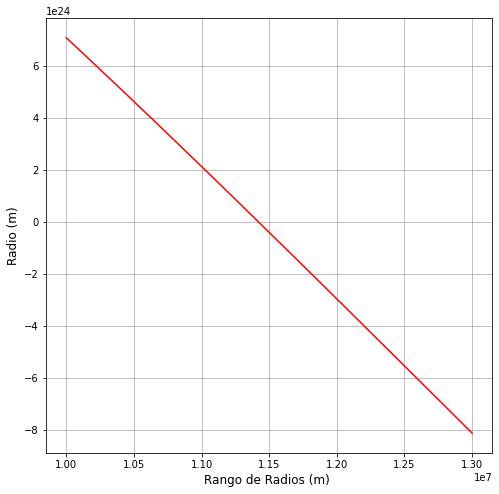

In [113]:
#Se hace una inspección previa gráfica para tener idea
R=np.arange(1e07,13e6)
plt.figure(figsize=(8,8))
plt.plot(R,f(R,L,rho,Rterrestre,rho_),color='red')
plt.xlabel('Rango de Radios (m) ',size=12)
plt.ylabel('Radio (m)',size=12)
plt.grid()

In [114]:
#como se ncontró un intervalo se puede usar los diferentes métodos usados en clase 
#Método de la biseccion 
root=sc.optimize.bisect(f,1.1e7,1.15e7,args=(L,rho,Rterrestre,rho_)) #m
#Método de la secante
root1=opt.newton(f,1.1e7,args=(L,rho,Rterrestre,rho_),x1=1.2e7)

In [115]:
root/Rterrestre

1.7927376998113937

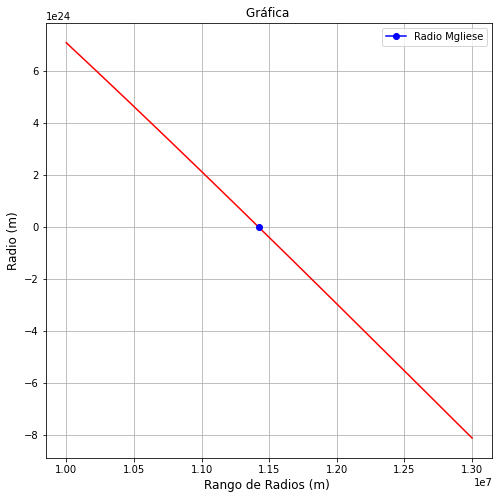

In [116]:
#Graficando con la raiz , en este caso el radio de Gliese 832c
R=np.arange(1e07,13e6)
plt.figure(figsize=(8,8))
plt.plot(R,f(R,L,rho,Rterrestre,rho_),color='red')
plt.plot(root,f(root,L,rho,Rterrestre,rho_),marker='o',color='blue',label='Radio Mgliese')
plt.xlabel('Rango de Radios (m) ',size=12)
plt.ylabel('Radio (m)',size=12)
plt.title('Gráfica ')
plt.grid()
plt.legend()
plt.show()

Por tanto se puede concluir que el radio del exoplaneta es 
$$R=11421.5\hspace{0.4cm}km$$ lo que significa que 
$$R_{g832c}=1.8*R_{tierra}$$